In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import logistic
from scipy.stats import norm
from scipy import stats
import seaborn as sns

from _hidden_functions import *

# Investigating 2021 Housing Prices (Part 1)

## Introduction:

In the United States, the housing market is a significant component of the economy, influencing household wealth, consumer spending, and employment. Historically, periods of rapid growth in housing prices have been associated with economic expansion, while declines in prices have signaled downturns. Therefore, monitoring housing prices is essential for policymakers, investors, and consumers alike to gauge the health of the economy and make informed decisions.

Housing in Berkeley, California has been of hot discussion for decades. Berkeley's swelling housing prices demonstrate the historical impact of the economy on housing: [housing prices exploded as the Bay Area’s tech-fueled economy roared back from the Great Recession](https://www.berkeleyside.org/2023/10/23/berkeley-affordable-housing-construction).

[Inflation](https://www.whitehouse.gov/cea/written-materials/2021/09/09/housing-prices-and-inflation/) can have both positive and negative impacts on the housing market. While moderate inflation may stimulate asset appreciation and reduce mortgage debt burdens, high inflation rates can lead to affordability challenges and speculative behavior. Achieving a balance between inflationary pressures and market stability is crucial for fostering a healthy housing market that promotes sustainable growth and equitable access to homeownership.

Thinking critically about the data and findings that underlie policymaking is essential. Transparency in policymaking fosters accountability. By scrutinizing the data behind policies, researchers, advocates, and citizens can hold decision-makers accountable for their choices and advocate for evidence-based interventions that benefit society as a whole.

In this assignment, you will analyze a dataset to assess the potential impact of investments in various sectors on the economy of US cities, particularly focusing on whether specific investments could lead to increased housing prices. As a data scientist hired by a policymaker, your objective is to provide evidence either supporting or challenging the assertions regarding the economic benefits associated with these investments.

In [16]:
# Let's read in the data.
df = pd.read_stata('Villas-Boas_2023pset3.dta')
edit_data(df, 98)

,city,state,pricesept2021,successteams,violentcrime2019,numberbars,aqi2020,gdp,popul2019,nteams,icecreamshops
0,Chandler,AZ,1450,0,0.593,79,119,237.470001,259.881012,0,5
1,Gilbert,AZ,1660,0,0.245,29,119,237.470001,253.619003,0,2
2,Glendale,AZ,1130,0,0.863,80,119,11.037726,253.951004,0,2
3,Mesa,AZ,1160,0,1.953,16,119,237.470001,518.159973,0,1
4,Phoenix,AZ,1260,1,11.803,425,119,237.473007,1688.722046,3,6
...,...,...,...,...,...,...,...,...,...,...,...
93,Richmond,VA,1090,0,1.068,146,38,78.702003,230.720993,0,1
94,Virginia Beach,VA,1290,0,0.581,197,34,89.523003,449.037994,0,5
95,Seattle,WA,1690,1,4.471,743,43,382.630005,763.705994,2,1
96,Spokane,WA,1000,0,1.520,177,41,26.872999,220.432007,0,0


You will be using the dataset ‘df’ to analyze some of the variables you assessed above to determine where the policymaker should focus their proposals. The dataset contains characteristics for 98 US cities from 2019 to 2021. You will investigate the following variables:


| Variable      | Definition                                           | Source             |
|---------------|------------------------------------------------------|--------------------|
| city          | City name                                            |                    |
| state         | State name                                           |                    |
| pricesept2021 | One bedroom housing price, in USD                   | www.Zumper.com     |
| successteams  | Dummy variable =1 if at least one NBA, NFL, or MLB team in a city had a winning record last season (2020 season), =0 otherwise | Google search |
| violentcrime2019 | Violent crimes (in thousands)                      | FBI                |
| numberbars    | Number of bars, count                               | www.yellowpages.com|
| aqi2020       | Annual 2020 air quality index (AQI)                 | EPA                |
| gdp           | Gross domestic product (billion $)                  | BEA                |
| popuul2019    | 2019 population (in thousands of people)            | FBI                |
| nteams        | Number of major professional sports teams           | Google search      |
| icecreamshops        | Number of ice cream shops           | Google search      |

### Question 1:

Based on the provided list of variables, which factors do you predict would have the largest impact on one-bedroom housing prices in September 2021, and which ones do you expect to have the smallest impact? Please list them in order of largest to smallest impact.

- The number of wins held by an NBA, NFL, or MLB team in the 2020 season
- The number of violent crimes in 2019
- The number of bars in 2021
- The air quality index (AQI) in 2020
- The gross domestic product (GDP) in 2021
- The population in 2019
- The number of major professional sports teams 
- The average household size in 2020
- The number of restaurants in 2021
- The average household salary in 2020
- The number of national parks in 2021
- The number of ice cream shops in 2020

**Type your answer below.**

<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-top: 2px solid black; border-radius: 50px 50px 0 0; margin-top: 10px;"></div>
</div>



<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-bottom: 2px solid black; border-radius: 0 0 50px 50px; margin-top: 10px;"></div>
</div>


## Sports Teams

The policymaker is a huge fan of sports, and they hypothesize that the cities with at least one sports team win in the 2020 season have higher housing prices than cities without a sports team win in the 2020 season.

Run the following cell to group the dataset by the success of sports teams in each city and plot histograms of one-bedroom housing prices for cities with successful and unsuccessful sports teams. The x-axis represents housing prices in USD, and the y-axis represents frequency.

In [17]:
# Group the dataset by 'successteams'
grouped_data = df.groupby('successteams')

### Question 2:

Plot an overlaid histogram of the distribution of housing prices for cities with successful sports teams and unsuccessful sports teams, respectively.

Feel free to explore matplotlib.pyplot at: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html.

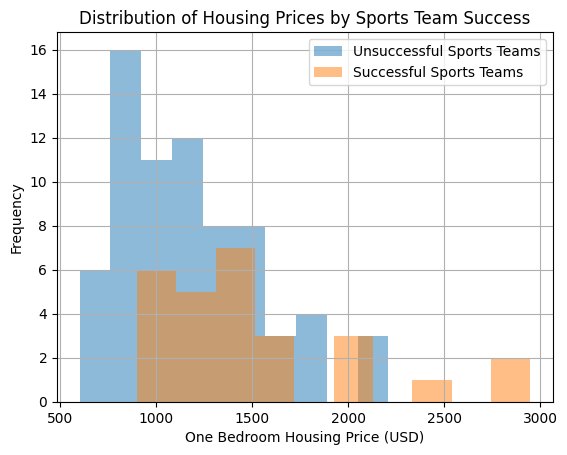

In [18]:
# Type code here:

# SOLUTION:

grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Unsuccessful Sports Teams', 'Successful Sports Teams'])
plt.title('Distribution of Housing Prices by Sports Team Success')
plt.show()

### Question 3:

What do you notice about the housing prices for cities with a successful sports team versus cities without a successful sports team?

**Type your answer below.**

<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-top: 2px solid black; border-radius: 50px 50px 0 0; margin-top: 10px;"></div>
</div>



<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-bottom: 2px solid black; border-radius: 0 0 50px 50px; margin-top: 10px;"></div>
</div>


Interesting! Let's dig a bit deeper and see how much having a successful sports team in a given city actually impacts the city's housing prices. We want to conduct the following steps in order to analyze the effect size of sports teams' success on housing prices:

1. Start by creating two variables: one for housing prices of cities with no sports teams, and another for housing prices of cities with sports teams. Both of these variables should be Series data.
   
2. Fit [Gaussian distributions](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) (hint: use norm.fit(*Series data*)) to each group of housing prices. Calculate the mean (mu_delta) and standard deviation (std_delta) of the each of these distributions.

3. Generate 1,000 random samples from the Gaussian distributions fitted to each group in Step 2. These samples represent hypothetical housing price data based on the distributions observed in the actual data.

4. Calculate the difference between the random samples generated for successful sports teams and unsuccessful sports teams. These differences, or deltas, represent the potential impact of sports team success on housing prices.

5. Fit a Gaussian distribution to the deltas. Calculate the mean (mu_delta) and standard deviation (std_delta) of the deltas distribution. This step helps quantify the average difference in housing prices between cities with successful and unsuccessful sports teams.

6. Calculate the probability that, for any given house, the price increases when the sports team is successful. This probability is derived from the Gaussian distribution of the deltas, indicating the likelihood of observing an increase in housing prices associated with sports team success. Hint: use the function [norm.cdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) to calculate the area to the left of a given datapoint. If we want the area to the right of that same datapoint, what arithmetic can we conduct?

7. Print out the calculated probability and mean of the deltas.

If you find this tricky, feel free to use ChatGPT and/or the provided solutions. These coding concepts won't be tested, but they will give a better intuitive understanding of effect size and they ways in which it can be calculated.

Hint: The mean of the deltas distribution represents the average difference in housing prices between cities with successful sports teams and cities without sports teams. The probability value represents the probability that a randomly chosen house in a city with a successful sports team will have a higher price compared to a house in a city without a successful sports team.

In [19]:
# Type code here:

# SOLUTION

# Select data for successteams = 0 and successteams = 1
no_success = df[df['successteams'] == 0]['pricesept2021']
success = df[df['successteams'] == 1]['pricesept2021']

# Fit Gaussian to data
no_mu, no_std = norm.fit(no_success)
succ_mu, succ_std = norm.fit(success)
    
# Generate random samples from the Gaussian distributions
no_samples = np.random.normal(no_mu, no_std, 1000)
succ_samples = np.random.normal(succ_mu, succ_std, 1000)
    
# Subtract the two arrays to get deltas
deltas = succ_samples - no_samples
    
# Fit Gaussian to the delta
mu_delta, std_delta = norm.fit(deltas)
    
# Calculate probability that for any given house the price increases
probability = 1 - norm.cdf(0, mu_delta, std_delta)
    
# Print probabilities and means
print(f"Probability: {probability}, Mean: {mu_delta}")

Probability: 0.6912345731275822, Mean: 332.02647445161136


Run the code below to plot the three Gaussian distributions. This can help supplement your understanding of the deltas, mean, and probability values.

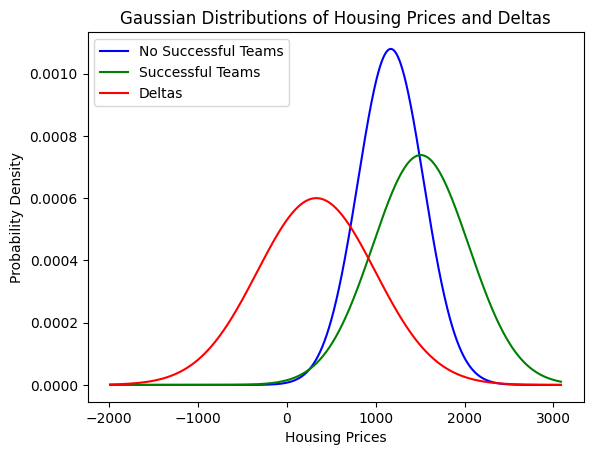

In [20]:
plot_gaussian_distributions(no_samples, succ_samples, deltas, no_mu, no_std, succ_mu, succ_std, mu_delta, std_delta)

In [21]:
# Generate data points for plotting the fitted Gaussian distribution
x = np.linspace(mu_delta - 3*std_delta, mu_delta + 3*std_delta, 1000)
pdf = norm.pdf(x, mu_delta, std_delta)

### Question 4:

Plot the fitted Gaussian distribution from the variables **x** and **pdf**, created above. 

**x**: An array of values used to plot the x-axis of the Gaussian (normal) distribution. It spans from the mean minus 3 SDs (standard deviations) to the mean plus 3 SDs. The range of x is chosen to cover three standard deviations on either side of the mean, which captures 99.7% of the data points in a normal distribution.

**pdf**: An array of values representing the probability density function of the Gaussian distribution at each point in x. The PDF provides the likelihood of each value in x occurring according to the fitted Gaussian distribution.

Remember to include labeling for the x and y axes, a title for the plot, and a legend for clarity. 

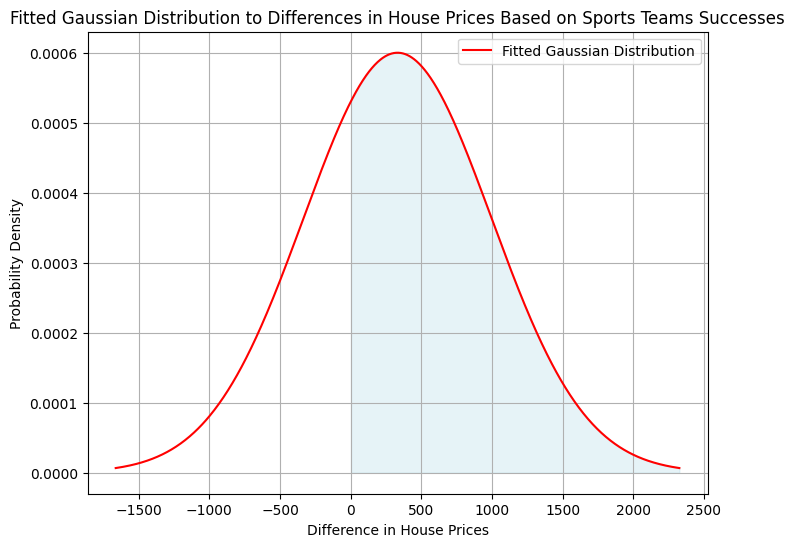

In [22]:
# Type code here:

# SOLUTION

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices Based on Sports Teams Successes')
plt.fill_between(x, pdf, where=(x >= 0), color='lightblue', alpha=0.3)  # Shade the area from 0 onwards
plt.grid(True)
plt.legend()
plt.show()

### Question 5:

In Question 3, we calculated the **probability** and **mean** variable. What do the variables **probability** and **mean** represent? How can the policymaker use them to gauge the importance of sports teams wins in changing housing prices?

**Type your answer below.**

<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-top: 2px solid black; border-radius: 50px 50px 0 0; margin-top: 10px;"></div>
</div>



<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-bottom: 2px solid black; border-radius: 0 0 50px 50px; margin-top: 10px;"></div>
</div>


Excited by the these findings, the policymaker wastes no time in planning on drafting key proposals aimed at leveraging the success of sports teams to drive economic growth.

### Question 6:

Draft a proposal for the policymaker to present to the mayor. Feel free to run some exploratory data analyses on the dataset to support your answer.

**Type your answer below.**

<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-top: 2px solid black; border-radius: 50px 50px 0 0; margin-top: 10px;"></div>
</div>



<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-bottom: 2px solid black; border-radius: 0 0 50px 50px; margin-top: 10px;"></div>
</div>


In [23]:
# OPTIONAL: Feel free to add code here.

The policymaker presents the proposed policy to the mayor, expecting approval, but the mayor is skeptical. "Is the most important thing we should be focusing on...sports?" the mayor questions.


The calculated *probability* and *mean* hold significant importance in understanding the effect size of the relationship between the success of sports teams in a given city and that city's housing prices. 

The probability represents the likelihood that housing prices will increase for any given house when the condition associated with successful teams is present. A higher probability suggests a stronger effect, indicating a greater likelihood of observing an increase in housing prices when teams are successful. 

Additionally, the mean offers a quantitative measure of the average difference in housing prices between successful and unsuccessful teams. A larger mean delta indicates a more substantial effect size, suggesting a greater increase in housing prices associated with successful teams compared to unsuccessful ones. 

Together, these metrics help quantify the effect size of the relationship between team success and housing prices. 

However, the mayor has a valid point. Food for thought: are we investigating correlation or causation? Can we make an informed decision from these calculations? More on this next time!

# Investigating 2021 Housing Prices (Part 2)

In Part 1,  we explored the role of the housing market in the economy and the impact of inflation, focusing on the effect of sports teams' success on housing prices. We used a dataset containing characteristics for 98 US cities from 2019 to 2021 to determine where a policymaker should focus their proposals. Specifically, we investigated the impact of sports teams' success on housing prices and found the mean of the deltas to be ~370 and the probability of any given housing price increasing as a result of sports teams' success to be ~70% (these variables might fluctuate due to the random sampling procedure).

Now, we'll expand this analysis to four more variables: air quality index (AQI), gross domestic product (GDP), number of violent crimes, and number of ice cream shops. 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import logistic
from scipy.stats import norm
from scipy import stats
import seaborn as sns

In [25]:
# Let's read in the data.
file_path = '/Users/mirandashen/Desktop/school_docs/urap/Villas-Boas_2023pset3.dta'
df = pd.read_stata(file_path)
edit_data(df, 98)

,city,state,pricesept2021,successteams,violentcrime2019,numberbars,aqi2020,gdp,popul2019,nteams,icecreamshops
0,Chandler,AZ,1450,0,0.593,79,119,237.470001,259.881012,0,5
1,Gilbert,AZ,1660,0,0.245,29,119,237.470001,253.619003,0,2
2,Glendale,AZ,1130,0,0.863,80,119,11.037726,253.951004,0,2
3,Mesa,AZ,1160,0,1.953,16,119,237.470001,518.159973,0,1
4,Phoenix,AZ,1260,1,11.803,425,119,237.473007,1688.722046,3,6
...,...,...,...,...,...,...,...,...,...,...,...
93,Richmond,VA,1090,0,1.068,146,38,78.702003,230.720993,0,1
94,Virginia Beach,VA,1290,0,0.581,197,34,89.523003,449.037994,0,5
95,Seattle,WA,1690,1,4.471,743,43,382.630005,763.705994,2,1
96,Spokane,WA,1000,0,1.520,177,41,26.872999,220.432007,0,0


## Ice Cream Shops

Let's start of by assessing the number of ice cream shops of the 98 cities in 2020. Run the cells below to visualize the number of ice cream shops and binarize the variable. Then, calculate the relative increase in housing prices again, this time for a random sample of 1,000 ice cream shop datapoints.

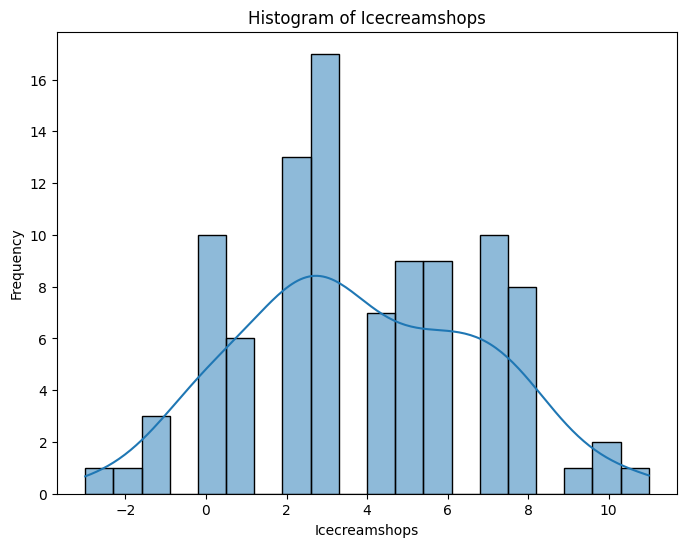

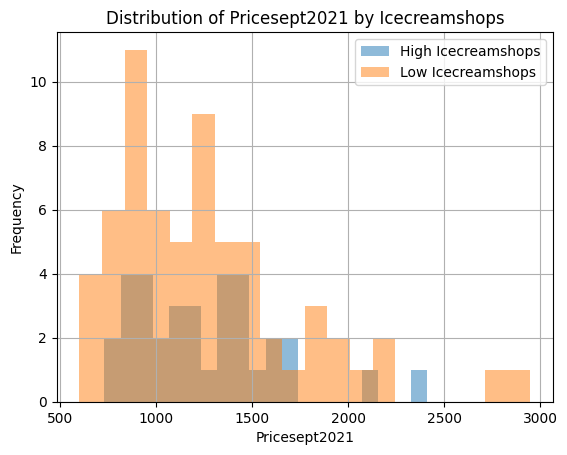

Probability: 0.5030205710790796, Mean: 4.697416492993946


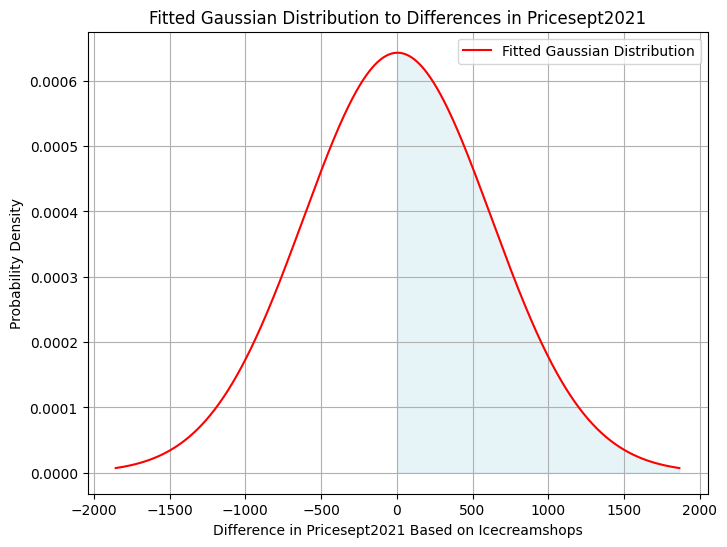

In [26]:
analyze_variable(df, variable='icecreamshops', target='pricesept2021', bins=20)

Run the code below to run an opposite analysis. That is, let's look at the impact of housing prices on ice cream shops.

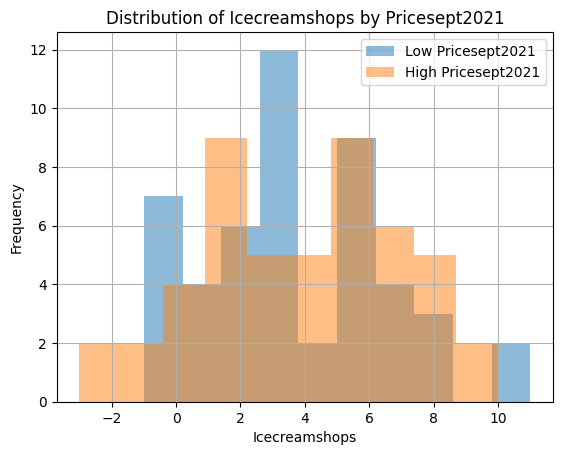

Probability: 0.5220722250618326, Mean: 0.2223995504367555


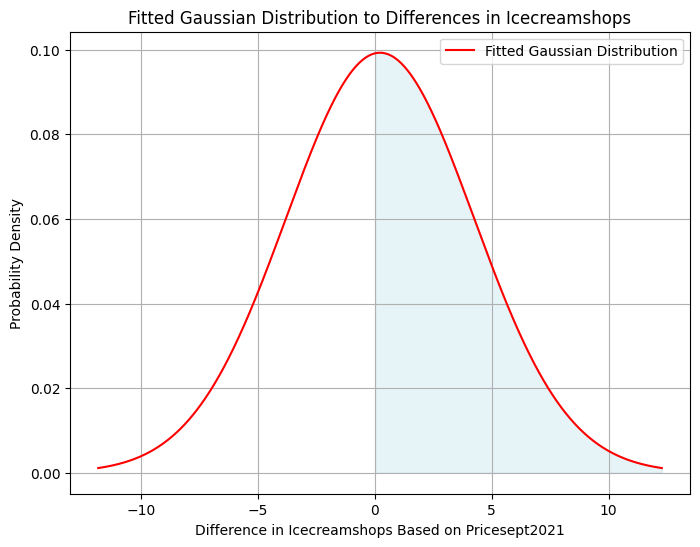

In [27]:
reverse_test_analysis(df, variable= 'icecreamshops', target='pricesept2021', bins=10)

### Question 7:

In our initial analysis, we explored how the presence of ice cream shops might affect housing prices. 

What might it mean to reverse this analysis and instead examine how housing prices might affect the number of ice cream shops? Compare the visualizations from both analyses and describe how the insights derived from these visualizations might differ.

**Type your answer below.**

<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-top: 2px solid black; border-radius: 50px 50px 0 0; margin-top: 10px;"></div>
</div>


<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-bottom: 2px solid black; border-radius: 0 0 50px 50px; margin-top: 10px;"></div>
</div>


Before choosing which sector to focus on, the policymaker wants to fully analyze the data we have. 

Let's run even more tests to investigate some additional variables.

## Air Quality Index (AQI)

Run the cells below to repeat the steps above, this time for AQI.

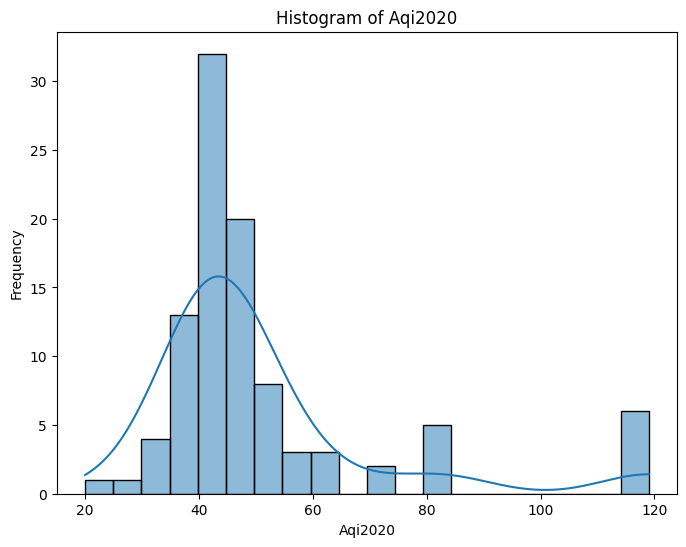

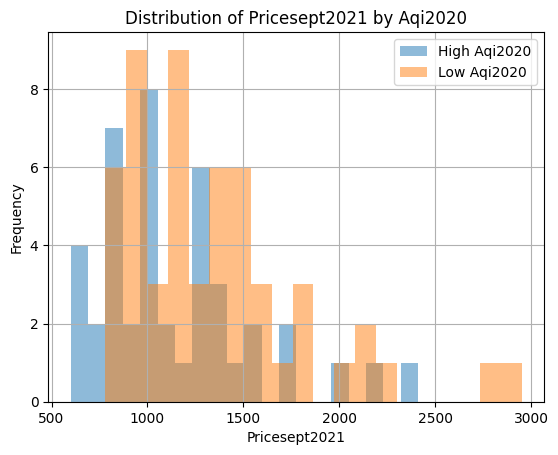

Probability: 0.6150705077768153, Mean: 184.53487633971747


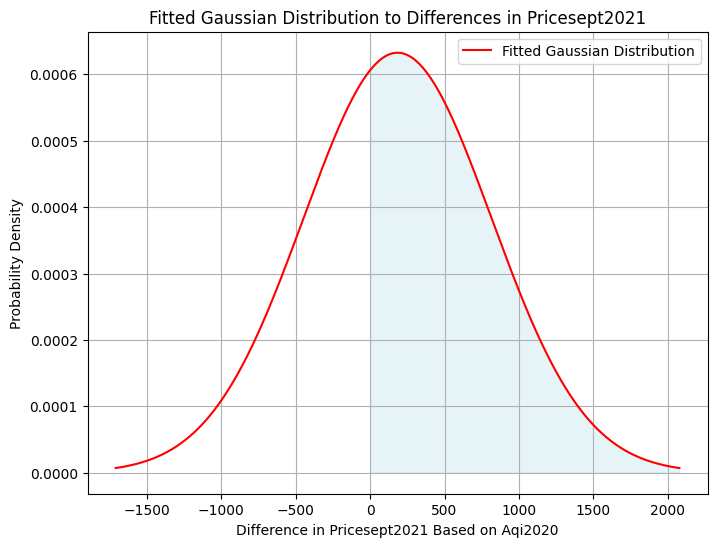

In [28]:
analyze_variable(df, variable='aqi2020', target='pricesept2021', bins=20)

## Gross Domestic Product (GDP)

Run the cells below to repeat the steps above, this time for GDP.

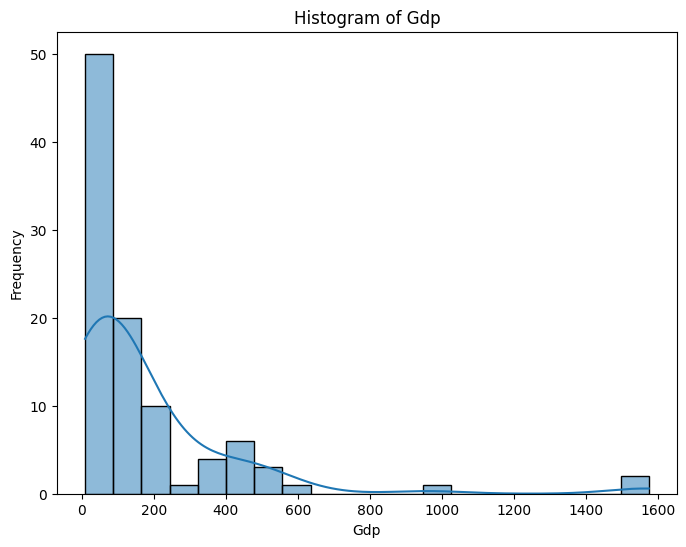

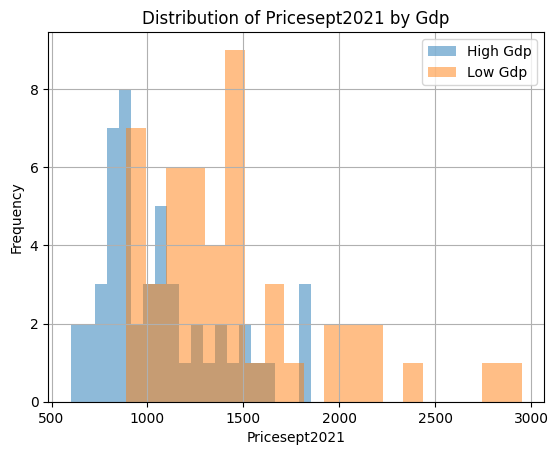

Probability: 0.750075934837565, Mean: 393.77761068467447


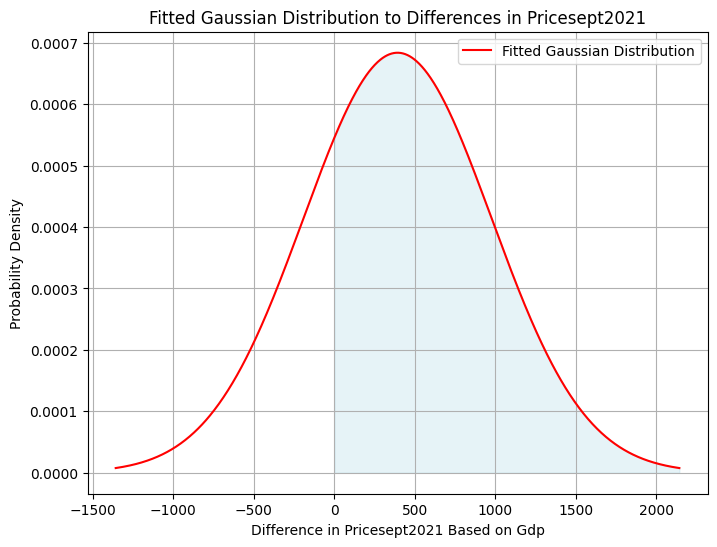

In [29]:
analyze_variable(df, variable='gdp', target='pricesept2021', bins=20)

Run the code below to again run a reverse analysis, similar to what was done for the ice cream shops variable.

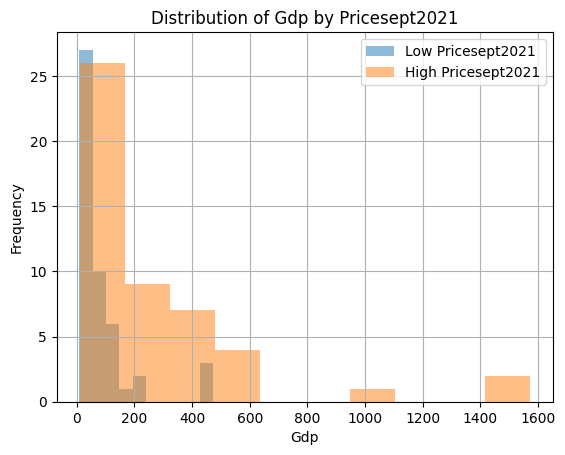

Probability: 0.685246698421862, Mean: 166.4121540475031


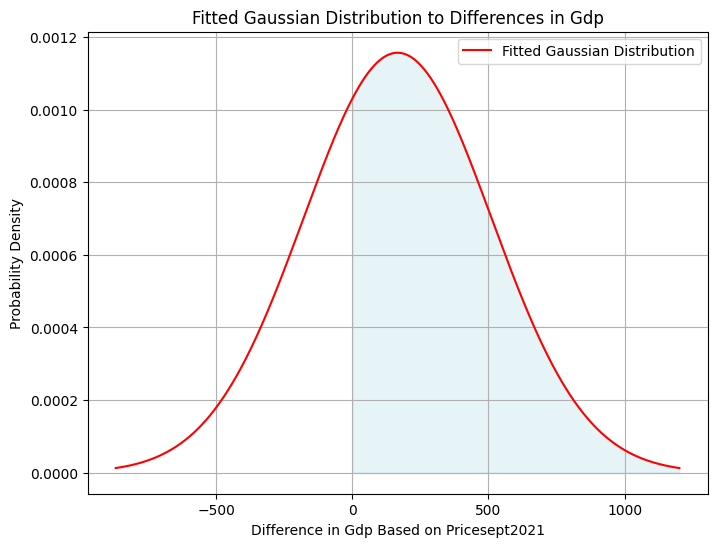

In [30]:
reverse_test_analysis(df, variable='gdp', target='pricesept2021', bins=10)

### Question 8:

Compare the visualizations from both the original and reverse analyses and describe how the insights derived from these visualizations might differ.

**Type your answer below.**

<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-top: 2px solid black; border-radius: 50px 50px 0 0; margin-top: 10px;"></div>
</div>


<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-bottom: 2px solid black; border-radius: 0 0 50px 50px; margin-top: 10px;"></div>
</div>


## Violent Crimes

Run the cells below to repeat the steps above, this time for violent crimes.

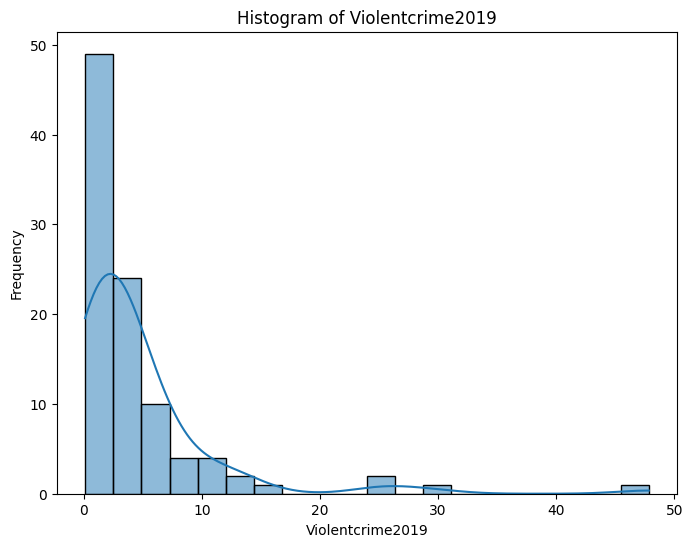

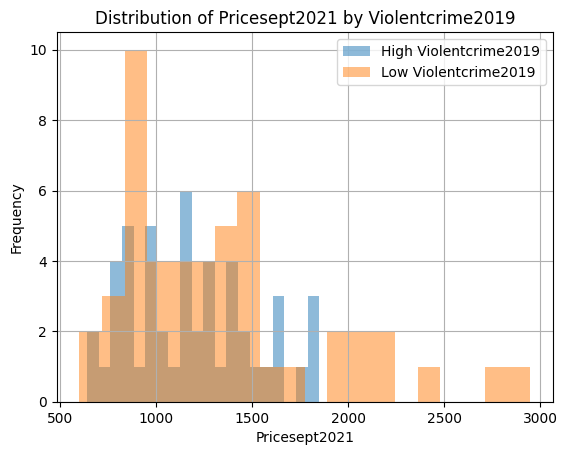

Probability: 0.5794655358468292, Mean: 124.205946310556


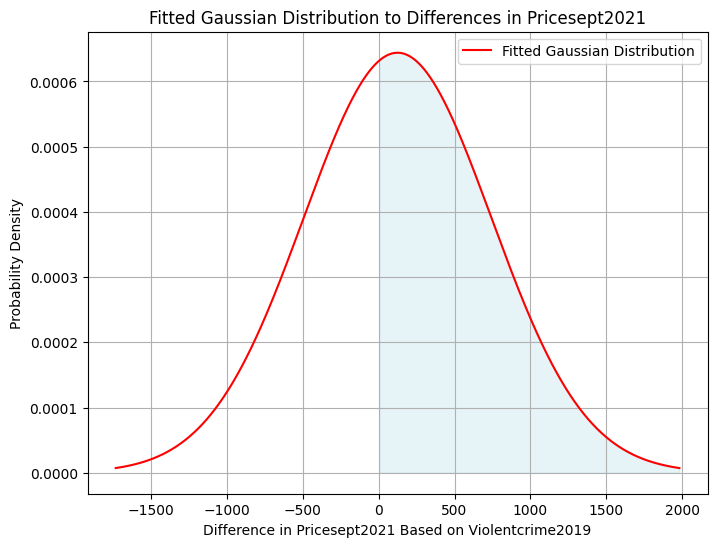

In [31]:
analyze_variable(df, variable='violentcrime2019', target='pricesept2021', bins=20)

### Question 9:

Fill in all the columns of the table below.

Reminder: the probability represents the increase in housing prices for 1) having at least one winning sports team, 2) having "good" AQI, 3) having "high" GDP, 4) having "high crime" in a given city.

Then, identify whether "probability" and "mean" can be synonymous with "effect size" or "statistical significance".

In [39]:
save_func = create_input_table()

In [40]:
# Run this cell below. Do not make any edits.

student_responses = save_func()
print(student_responses)

{'Sports Teams Success': {'Probability': '', 'Mean': ''}, 'AQI': {'Probability': '', 'Mean': ''}, 'GDP': {'Probability': '', 'Mean': ''}, 'Violent Crimes': {'Probability': '', 'Mean': ''}}


# Investigating 2021 Housing Prices (Part 3)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import logistic
from scipy.stats import norm
from scipy import stats
import seaborn as sns

In Part 2 of our investigation into 2021 housing prices, we delved deeper into several key variables potentially impacting housing markets across 98 US cities: Air Quality Index (AQI), Gross Domestic Product (GDP), and Violent Crimes. For each variable, we analyzed their distribution, classified them into binary categories, and calculated the probability and mean differences in housing prices between these categories.

## Assessing Variable Importance

A policymaker's goal is to prioritize interventions that maximize positive impacts on housing markets. To determine which variables are most influential, we should establish a threshold based on the calculated probabilities. This threshold will help identify variables where the likelihood of a positive impact on housing prices meets or exceeds a predefined level of significance.

## Setting a Threshold

Setting an appropriate threshold for probability is crucial. A higher threshold (e.g., 50% or more) suggests a stronger association between the variable and housing price increases, minimizing the risk of false positives and ensuring that policies are based on robust relationships. Lower thresholds (e.g., below 50%) may still indicate association but might require careful consideration of potential confounding factors and additional validation.

### Question 10:

Write code that produces a scatterplot that graphs the probabilities and means for each variable we analyzed: Sports Team Success, Ice Cream Shops, AQI, GDP, and violent crimes. 

Using this graph, determine the order of importance for the policymaker to assess how they can best produce a positive impact on housing prices in a given city. 

Draw a line separating the variables you deem most important to those that are least important.

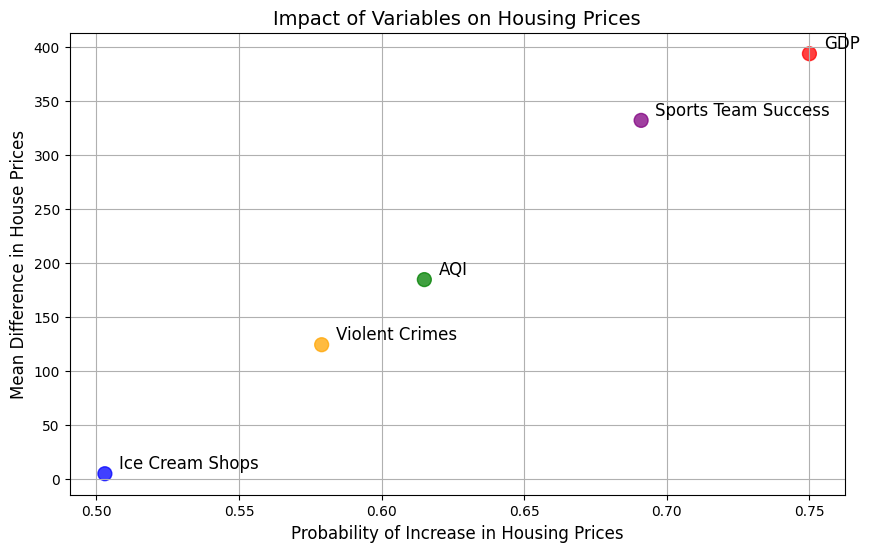

In [21]:
# Type code here:

# SOLUTION

# Variables and their approximated results
variables = ['Ice Cream Shops', 'AQI', 'GDP', 'Sports Team Success', 'Violent Crimes']

# Probabilities of increase in housing prices
probabilities = [0.503, 0.615, 0.750, 0.691, 0.579]

# Mean differences in house prices
means = [4.70, 184.53, 393.78, 332.03, 124.21]

# Colors for each variable
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(probabilities, means, color=colors, s=100, alpha=0.75)

# Add text labels
for i, var in enumerate(variables):
    plt.text(probabilities[i] + 0.005, means[i] + 5, var, fontsize=12)

# Plot labels and title
plt.xlabel('Probability of Increase in Housing Prices', fontsize=12)
plt.ylabel('Mean Difference in House Prices', fontsize=12)
plt.title('Impact of Variables on Housing Prices', fontsize=14)

plt.grid(True)
plt.show()

**Type your answer below.**

<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-top: 2px solid black; border-radius: 50px 50px 0 0; margin-top: 10px;"></div>
</div>



<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-bottom: 2px solid black; border-radius: 0 0 50px 50px; margin-top: 10px;"></div>
</div>


### Question 11:

Based on your answer to Question 10, the policymaker wants to draft a brief policy that should be proposed to the mayor. Run the code below to see plots of each variable against housing prices. Based on these graphs, choose the most important variable(s) and draft a brief policy that should be proposed to the mayor.

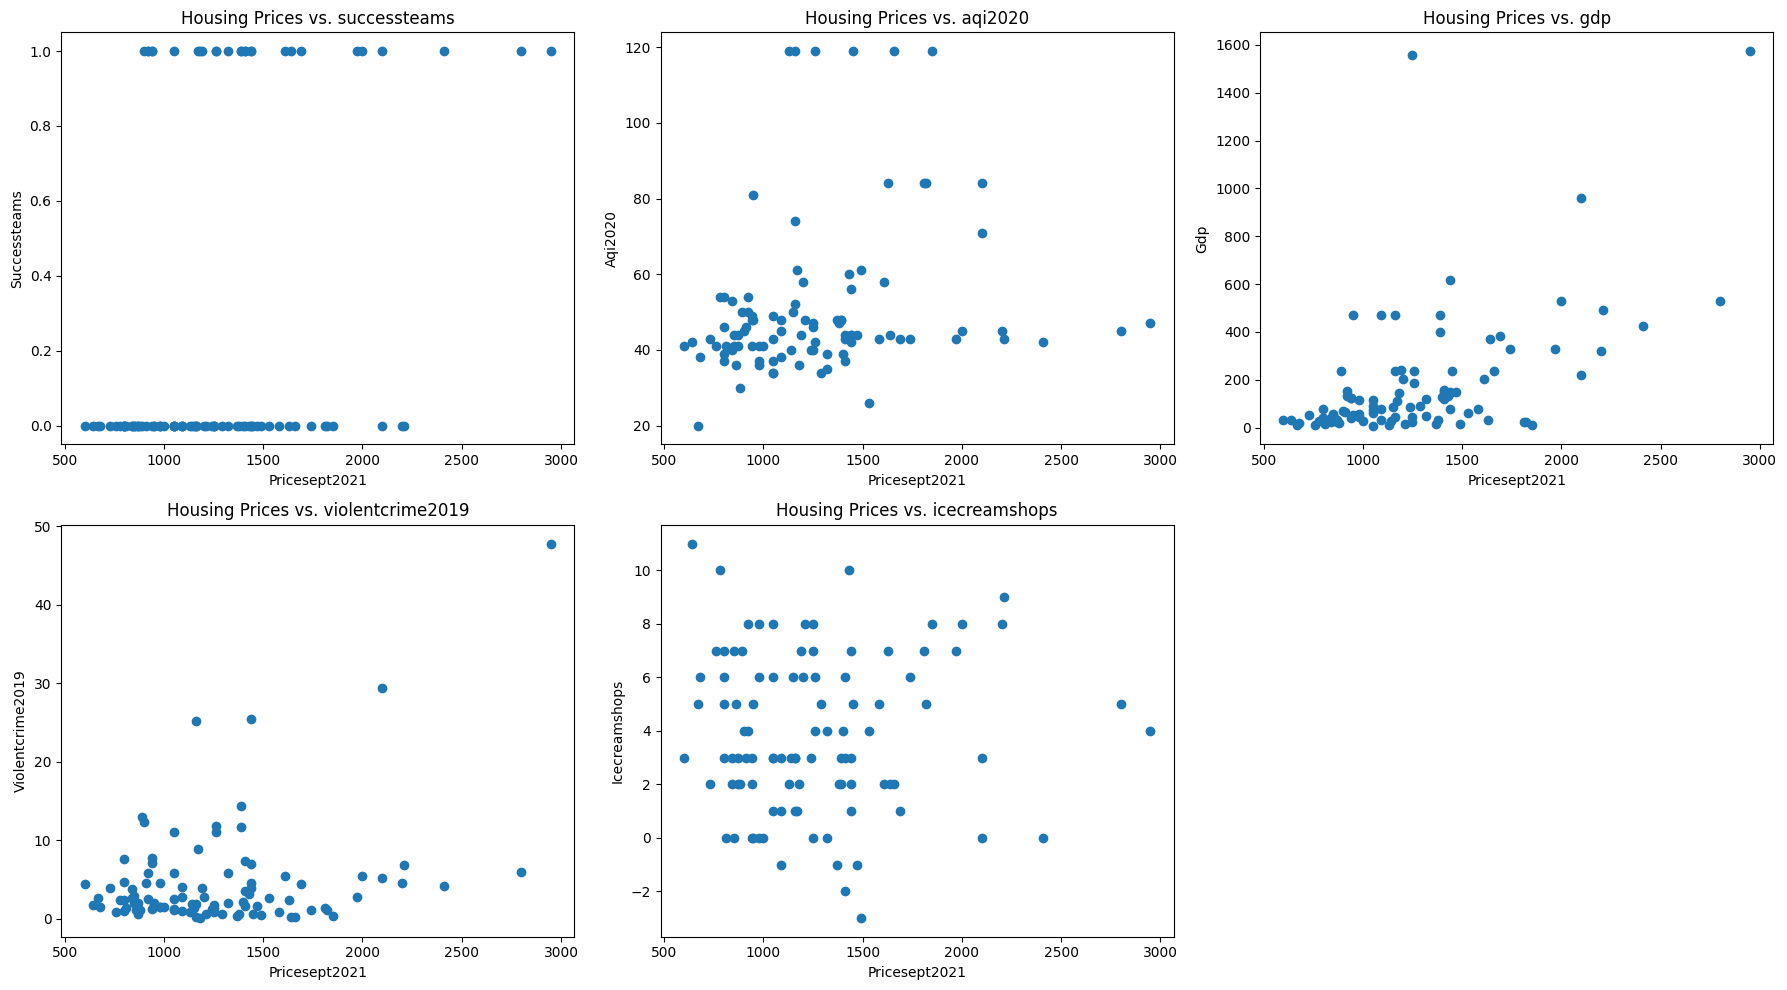

In [24]:
plot_scatter_grid(df, target='pricesept2021', variables=['successteams', 'aqi2020', 'gdp', 'violentcrime2019', 'icecreamshops'])

In Question 10, you plotted the probability and mean values of each variable and used the graph to determine order of importance. However, policymakers often have biases in choosing what to target. With this in mind, is there a different order of variables you would choose to target, from most to least important? If so, why?

From there, propose a policy based on your chosen most important variables.

**Type your answer below.**

<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-top: 2px solid black; border-radius: 50px 50px 0 0; margin-top: 10px;"></div>
</div>


<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-bottom: 2px solid black; border-radius: 0 0 50px 50px; margin-top: 10px;"></div>
</div>


### Question 12:

Understanding the directionality of the relationship between variables is crucial in determining causation. [Hill’s criteria](https://sensibility.berkeley.edu/index.php?title=6.2_Hill%27s_Criteria#Definitions-0), particularly the concepts of cause preceding effect (temporality), is an essential tool for assessing this directionality. We can better understand whether changes in a variable like AQI, GDP, or Violent Crimes lead to changes in housing prices, or if the relationship might be influenced by other factors.

a) Can a causal relationship be concluded from our results? If not, what, if anything, can be concluded? How confident are you in this conclusion?

b) How can we ensure that changes in variables such as AQI, GDP, and Violent Crimes precede changes in housing prices? How can we verify the temporal sequence of these changes?

**Type your answer below.**

<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-top: 2px solid black; border-radius: 50px 50px 0 0; margin-top: 10px;"></div>
</div>


<div style="text-align: center; margin-top: 10px;">
    <div style="width: 100%; height: 30px; border-bottom: 2px solid black; border-radius: 0 0 50px 50px; margin-top: 10px;"></div>
</div>
